
Данный ноутбук содержит в себе интуитивные и неформальные определения, нужные для понимания необходимой теории. Для более подробного изучения можно обратиться к списку литературы, представленному в конце.

### 1. Системы множеств. Вероятностное пространство

**Определение 1.1**
Элементы $\omega \in \Omega$ называют *элементарными исходами* некоторого эксперимента, а $\Omega$ —  *пространством элементарных исходов*

Подмножество $A \subset Ω$ назовем **событием**, произошедшим, если эксперимент закончился одним из элементарных исходов $\omega$, входящих в множество A. 

**Определение 1.2**
Система подмножеств A, для которых выполнен $\text{ряд условий}$ называется *сигма-алгеброй* и обозначается $\mathscr{F}$

  Первые два определения задают два параметра тройки, из которой складывается вероятностное пространство. 

**Определение 1.3**
Функция $P:\mathscr{F}\to\mathbb{R}$ называется *вероятностностной мерой* или *вероятностью*, если она принимает значения от нуля до единицы и $\text{аддитивна}$ по $\mathscr{F}$. 

Если хотим посчитать например вероятность события $A$, обозначим $P(A)$ и получим число от 0 до 1.

Итак, теперь если рассмотреть пространство, где задана тройка, определенная выше, то получится вероятностное пространство: 

$(\Omega, A, \mathscr{F})$


### 2. Элементарные вероятностные модели

***Пример 2.1***

Пусть мы бросаем симметричную монету, тогда у нас возможны два элементарных исхода:

>$\Omega = ${$\text{орел}, \text{решка}$}
Теоретически их может быть больше — монета зависла в воздухе, экспериментатор отказался бросать :) Этот пример — **классическая вероятностная модель**, когда исходов конечно и они равновероятны. В этом случае достаточно разделить 1 на $\text{мощность множества}$ элементарных исходов $|\Omega|$, чтобы посчитать вероятность наступления события "выпал орел":\$P(\text{"выпал орел"})=\frac{1}{|\Omega|}=\frac{1}{2}$

***Пример 2.2***

>При игре в дартс на Физтехе чтобы выбить максимальное число очков нужно попасть в красный круг с радиусом $r_1=2$ см. Считая, что все дротики прилетают на круглую игровую поверхность радиусом $r_2=10$ см, найти вероятность того, что дротик **не** попадет в красный круг.\Разберемся далее с **геометрической вероятностной моделью**. В этом случае $\Omega$ является $\text{область евклидова пространства}$, для которой можно задать объем (или площадь в двумерном случае). Обозначим за $A$ событие "дротик попал в красный круг"$P(A)=\frac{|A|}{|\Omega|}=\frac{S_A}{S_{\Omega}}=\frac{\pi2^2}{\pi10^2}=0.04$. Tогда вероятность того, что дротик не попал в красный круг равна $1-P(A)=1-0.04=0.96$ 

Кстати, давайте немного попрактикуемся в языке Python. В частности, реализуем функцию, которая принимает на вход радиусы $r_1, r_2$ и отдает вероятность того, что дротик **не** попадет в красный круг и добавим визуализацию.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Вероятность того, что дротик не попал в красный круг равна 0.75


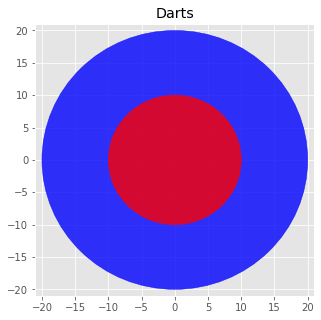

In [0]:
def darts(r_1=2, r_2=10):
    """
        draws darts plot and calculates probability
        from ex 2.2
    """
    if r_2 < r_1:
        return ValueError
    
    large_circle = plt.Circle((0, 0), r_2, color='b',alpha=0.8)
    small_circle = plt.Circle((0, 0), r_1, color='r', alpha=0.8)
    
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax.set_xlim(-r_2-1,r_2+1)
    ax.set_ylim(-r_2-1,r_2+1)
    ax.add_artist(large_circle)
    ax.add_artist(small_circle)
    ax.set_title('Darts')
    result_prob = 1 - (r_1/r_2)**2
    print(f'Вероятность того, что дротик не попал в красный круг равна {result_prob}')
    plt.show()
    
    
darts(r_1=10,r_2=20)



### 3.  Условная вероятность. Теорема Байеса

    Условная вероятность возникает в том случае, если мы хотим вычислить вероятность наступления некоторого события $A$ при условии, что событие $B$ уже наступило.


***Определение 3.1***
Условной вероятностью $A$ при условии $B$, причем $P(B)>0$, называется $P(A|B)=\frac{P(AB)}{P(B)}$. Здесь $P(AB)$ — вероятность одновременного наступления событий $A$ и $B$.

***Пример 3.1***:

>Достают две карты из колоды в 36 карт без повторения. Каков шанс, что обе карты окажутся масти треф? Рассмотрим событие **$A$="первое появление карты масти треф"** и событие **$B$="второе появление той же масти треф".** Заметим, что второе событие зависит от первого. $P(A) = \frac{9}{36}=\frac{1}{4}$ — вероятность наступления события $А$. $P(B|A) = \frac{9-1}{36-1}=\frac{8}{35}$ — вероятность наступления события $B$. $P(AB) = P(B)P(B|A) = \frac{1}{4}\frac{8}{35}=\frac{2}{35}$ — вероятность, что будут вытащены обе карты масти треф.

***Пример 3.2***

>Брошено шесть шестигранных игральных костей, с какой вероятностью на всех выпала пятерка при условии, что на первых трех выпала пятерка?$A$="на первых трех пятерка", $P(A)=\frac{1}{6^3}$,$B$="на всех костях пятерка", $P(B)=\frac{1}{6^6}$,$P(B|A)=\frac{P(AB)}{P(A)}=\frac{6^3}{6^6}=\frac{1}{216}=0.00463$


***Теорема 3.1 (Формула полной вероятности)***

Назовем *разбиением* систему событий {$A_1,..,A_n$} разбиением, если никакие два события из разбиения не пересекаются и покрывают все множество элементарных исходов $\Omega$, причем $P(A_i) > 0, \forall i \in 0..n$. Тогда для любого события $B$ верна формула:

$P(B)=\sum_{i=1}^{n}P(B|A_i)P(A_i)$

***Теорема 3.2 (формула Байеса)***

$P(A|B)=\frac{P(B|A)\,P(A)}{P(B)}$, $P(B) > 0$

Заметим, что если использовать формулу полной вероятности, то можно записать формулу Байеса в виде:

$P(A_i|B)=\frac{P(B|A_i)\,P(A_i)}{\sum_{i=1}^{n}P(B|A_i)P(A_i)}$


***Пример 3.3***

>Жители некоторых трех районов приходят в банк и хотят взять кредит. Жители первого района приходят с частотой 0.6, второго — 0.3, а третьего — с частотой 0.1. Вероятность того, что жителю первого района одобрят кредит равна 0.4, что жителю второго — 0.9, что третьего — 0.2. Известно, что последнему жителю одобрили кредит. С какой условной вероятностью это был житель третьего дома? 


>Введем обозначения: $B$='последнему жителю одобрили кредит', $A_1$='последний клиент был из первого района'; $A_2$='последний клиент был из второго района'; $A_3$='последний клиент был из третьего района'. Теперь разберемся, как следует записать события через вероятность:$P(A_1)=0.6$, $P(A_2)=0.3$, $P(A_3)=0.1$, $P(B|A_1)=0.4$, $P(B|A_2)=0.9$, $P(B|A_3)=0.2$.

>Хотим найти $P(A_3|B)=\frac{P(B|A_3) P(A_3)}{P(A)}=\frac{P(B|A_3)P(A_3)}{P(B|A_1)P(A_1)+P(B|A_2)P(A_2)+P(B|A_3)P(A_3)}=\frac{0.2\, 0.1}{0.4\,0.6+0.9\,0.3+0.2\,0.1}=0.038$

P.S. зачем изучать условную вероятность? Очень просто! В машинном обучении, например, часто приходится выбрать класс, к которому отнести некоторый объект при известных условиях. Существуют $\text{классификаторы}$ и $\text{методы}$, основанные на теореме Байеса и названные в честь этой формулы. Классическая задача — кредитный скоринг. При наборе признаков (условий) определить, стоит ли выдавать кредит человеку.

### 4. Независимость. Распределения вероятностей

**Определение 4.1**
События $A$ и $B$ назовем **независимыми**, если выполнено утверждение: 
$P(AB)=P(A)P(B)$

  На практике при подсчете вероятностей чаще всего рассматриваются события, определяемые с помощью действительных чисел.

**Определение 4.2**
Вероятностная мера $P$, заданная на $(\mathbb{R}$,$\mathscr{B}(\mathbb{R}))$, называется распределением вероятностей. Здесь $\mathscr{B}(\mathbb{R})$ — $\text{борелевская сигма-алгебра}$ — система из отрезков, (полу)интервалов на множестве действительных чисел $\mathbb{R}$.


**Определение 4.3**
Функция $F:\mathbb{R}\to[0,1]\, F(x)=P((-\infty,x])$ называется функцией распределения, соответствующей распределению вероятностей $P$.

  Проще говоря, F описывает вероятность того, что в результате эксперимента будет получено действительное число, меньшее либо равное, чем x. 
    
Заметим, что если вероятность сосредоточена не более чем в счетном числе точек, то такое распределение — **дисректное**. В случае, если вероятность распределена по более чем счетному множеству точек, то такое распределение считается **абсолютно непрерывным**. Заметим также, что не все существующие распределения делятся на эти два класса. Но мы будем рассматривать только дискретный и абсолютно 
непрерывный случаи. Введем фукнцию, характеризующую "сосредоточенность" точек, содержащих вероятность.

**Определение 4.4**
Функция $p(t), t \in \mathbb{R}$, такая, что $\int_\mathbb{R}p(t)dt=1$ и $F(x)=\int_{-\infty}^{x}p(t)dt$, называется *плотностью абсолютно непрерывного распределения* $P$, соответсвующего функции распределения $F$.

**Пояснение**: первое условие — сумма (в дисректном случае) либо интеграл (в абсолютно непрерывном случае) по всем $t$ дает единицу, то есть функция плотности содержит всю информацию о том, как, где и сколько вероятности содержится по всем возможным исходам. Второе условие эквивалентно тому, что если функция распределения показывает вероятность не превзойти значение $x$ в результате эксперимента, то плотность  — что получится ровно значение $x$. 

Для работы с распределениями отлично подходят пакеты `scipy.stats` и `numpy`.

Существует набор заранее известных распределений, для которых уже вычислены функции и известно, при каких обстоятельствах их стоит применять. Рассмотрим некоторые из них, а именно:


Начнем с важнейших примеров **дискретных** распределений. 


Важнейшие дискретные распределения:

Назовем носителем распределения множество, на котором оно определяется. Заметим, что у распределений есть параметры, которые характеризуют конкретный случай. Будем считать, что $k \in \mathbb{N}$


|Распределение|Обозначение|Носитель|Параметр|Плотность| Смысл |
|---------|---------|---------|---------|---------|---------|
|Равномерное дискретное|$R${$1,...,N$}|{$1,..,N$} |$N \in \mathbb{N}$| $p(k)=\frac{1}{N}$|Бросок $N$-гранного кубика |
|Распределение Бернулли| $Bern(p)$ | $p\in${$0,1$} |{$0,1$}|$p(0)=1-p; p(1) = p$ |Один бросок монеты |
|Распределение Пуассона| $Pois(\lambda)$ | $\mathbb{Z}_+$ | $\lambda$ |$p(k)=\frac{\lambda^k}{k!}e^{-\lambda}$ |Число событий, произошедших за фиксированное время|

Как видно из таблицы, каждое распределение описывает результаты эксперимента по определенному закону. И если мы видим, что эксперимент похож по сути на смысл одного из распределений, то подобрав нужные параметры, можем описать так эксперимент.


#### Равномерное дискретное распределение

Функция `randint` из `numpy` равновероятно возвращает одно из значений из множества {$1,...,N$} для каждой из n_points точек. Вы можете поменять параметры, передаваемые в функцию и посмотреть, изменится ли график.

In [0]:
def plot_uniform(N=10000, n_points=1000):
    """
        отрисовывает распределение случайных точек по равномерному закону.
        N: параметр распределения
        n_points: число точек распределения
    """
    dst = np.random.uniform(0,N,n_points)
    plt.hist(dst,density=True,histtype='stepfilled')
    plt.title('Uniform')

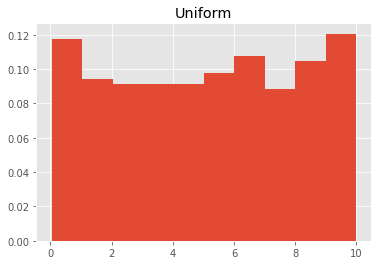

In [0]:
plot_uniform(10, 1000)

Что можно заметить при уменьшении числа точек? А при увеличении $N$? Попробуйте различные параметры чтобы убедиться, что максимально равномерное распределение возникает при малых значениях $N$ и больших $npoints$. Действительно, чем меньше число доступных принимаемых значений и чем больше экспериментов проведено, тем меньше **разброс** или **дисперсия**, как мы будем называть ее далее. Функция же, которая отвечает за "проведение" эксперимента называется **случайной величиной**. Но формально поговорим об этом в следующем параграфе, а теперь вернемся к рассмотрению дискретных распределений. На очереди — Бернулли.

#### Распределение Бернулли

заметим, что здесь используем функцию `numpy.random.binomail`, которая соответсвует биномиальному распределению, по сути представляющему бросок монеты $n$ раз, таким образом, положив $n=1$, получим Бернулли

In [0]:
def plot_bern(p=0.5, n_points=1000):
    """
        отрисовывает распределение случайных точек по закону Бернулли.
        p: параметр распределения, равный вероятности выпадения орла 
    """
    dst = np.random.binomial(1,p,n_points)
    plt.hist(dst,density=True,histtype='stepfilled')
    plt.title('Bernoulli')

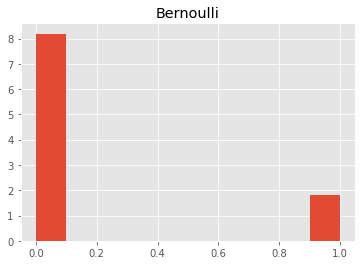

In [0]:
plot_bern(0.2)

У нас всего два возможных значения — ноль и единица (орел и решка). И в зависимости от "симметричности" монеты один столбец будет длиннее другого

#### Распределение Пуассона

In [0]:
def plot_poisson(lmb=5, n_points=1000):
    """
        Отрисовывает распределение случайных точек по закону Бернулли.
        lambda: параметр распределения,характеризующий среднее количество
        событий за фиксированный промежуток времени
    """
    dst = np.random.poisson(lmb,n_points)
    plt.hist(dst,density=True,histtype='stepfilled')
    plt.title('Poisson')

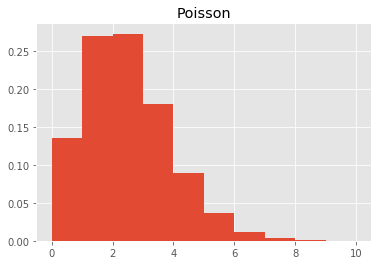

In [0]:
plot_poisson(2,50000)

"Исследования о вероятности приговоров в уголовных и гражданских делах" — статья, в которой было введено данное распределение. Другие примеры других ситуаций, которые можно смоделировать, применив это распределение: поломки оборудования, длительность исполнения ремонтных работ стабильно работающим сотрудником, ошибка печати, рост колонии бактерий в чашке Петри, дефекты в длинной ленте или цепи, импульсы счетчика радиоактивного излучения, количество забиваемых футбольной командой голов и многое другое

Перейдем к рассмотрению другого класса распределений — абсолютно непрерывных. 

примем $a,b, \sigma^2 \in \mathbb{R}, a<b$, 

$I(pred)$ — индикатор предиката $pred$, равный 1, если условие $pred$ выполнено и нулю иначе.

|Распределение|Обозначение|Носитель|Параметр|Плотность| Смысл |
|---------|---------|---------|---------|---------|---------|
|Равномерное распределение| $R[a,b]$ | $a,b$ | $[a,b]$ | $p(x)=\frac{1}{b-a}I(x\in[a,b])$ |Случайная точка из отрезка|
|Нормальное распределение| $\mathscr{N}(a\,\sigma^2)$ | $\mathbb{R}$ | $a\, \sigma^2$ | $p(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-a)^2}{2\sigma^2}}$ |Часто встречается в природе. Широко применяется в статистике, машинном обучении. Хорошо моделирует, например, погрешности измерений. Может использоваться также для приближения других распределений|
|Экспоненциальное распределение |$\lambda>0$| $Exp(\lambda)$ | $\mathbb{R}_+$ | $p(x)=\lambda e^{-\lambda}I(x>0)$ |Время между двумя последовательными свершениями одного и того же события.|


#### Равномерное непрерывное распределение

In [0]:
def plot_uniform(a=0,b=1,n_points=1000):
    """
        отрисовывает распределение случайных точек по равномерному непрерывному закону.
        a,b: начало и конец отрезка
    """
    r = sts.uniform.rvs(loc=a, scale=b-a, size=n_points)
    plt.hist(r, density=True, histtype='stepfilled')
    plt.title('Uniform')

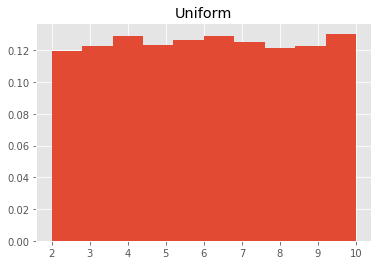

In [0]:
plot_uniform(2,10,10000)

#### Нормальное распределение

Его также называют **гауссовым**. С этим распределением связана важнейшая Центральная предельная теорема (ЦПТ), которая гласит, что если величина является суммой многих случайных слабо взаимозависимых величин, каждая из которых вносит малый вклад относительно общей суммы, то центрированное и нормированное распределение такой величины при достаточно большом числе слагаемых стремится к нормальному распределению. 

In [0]:
def plot_norm(a=0,sigma=1,n_points=10000):
    """
        отрисовывает распределение случайных точек по равномерному нормальному закону.
        a — параметр, характеризующий среднее значение
        sigma — параметр, характеризующий разброс параметров
    """
    r = sts.norm.rvs(loc=a,scale=sigma, size=n_points)
    plt.hist(r, density=True, histtype='stepfilled',alpha=0.8)
    plt.title('Normal')

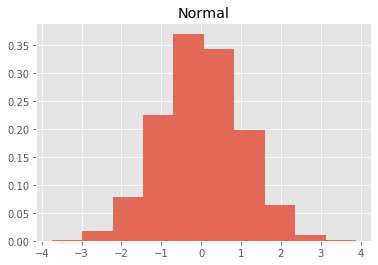

In [0]:
plot_norm(0,1)

#### Экспоненциальное распределение

Интересно, что это распределение обладает свойством отсутствия памяти. Поясним на примере. В качестве эксперимента будем засекать время ожидания пассажиром автобуса. Пусть автобусы приходят на остановку случайно, но с некоторой фиксированной средней интенсивностью. Тогда количество времени, уже затраченное пассажиром на ожидание автобуса, не влияет на время, которое ему ещё придётся прождать.

In [0]:
def plot_exp(lmbd=0,n_points=10000):
    """
        отрисовывает распределение случайных точек по равномерному непрерывному закону.
        lambda — параметр, характеризующей среднее возрастание 
        интенсивности процесса за единицу времени
    """
    r = sts.expon.rvs(lmbd, size=n_points)
    plt.hist(r, density=True, histtype='stepfilled')
    plt.title('Exponential')

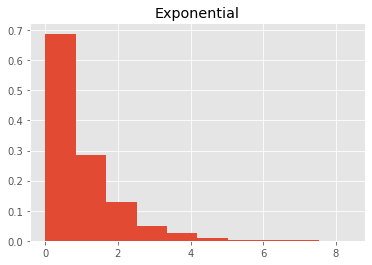

In [0]:
plot_exp()

### 5.Статистики распределений. Среднее и дисперсия.

В предыдущем разделе мы упомянули среднее значение и разброс. Немного формализуем эти понятия. За более формальными определениями можно обратиться к https://istina.msu.ru/download/9446616/1dRPIT:oTvN8KzzYSrqoE4ZWdTY9JMa8lY/

**Определение 5.1**
 Математическое ожидание (взвешенное по вероятностям возможных значений) значение. Наиболее *ожидаемый* исход
 
 **Определение 5.2**
Дисперсия — мера разброса результатов эксперимента относительно её математического ожидания

**Определение 5.3**
Случайная величина — функция, отвечающая за проведение эксперимента, то есть отображающая значения из носителя в множество допустимых ответов. Это очень важное определение для понимания математического аппарата и доказательства теорем в теории вероятностей, с формальным определением которого можно ознакомиться по ссылке выше.

Рассмотрим гистограмму нормального распределения

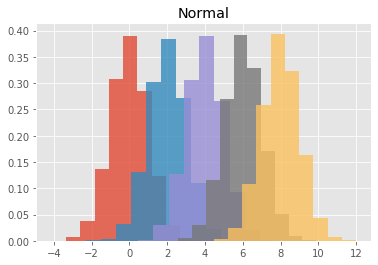

In [0]:
for i in range(0,10,2):
    plot_norm(a=i)

Видим — меняется наиболее вероятный исход (самый высокий столбец гистограммы) при изменении параметра $a$, который как мы видим является как раз математическим ожиданием! 

Проверим, что будет, если менять дисперсию.

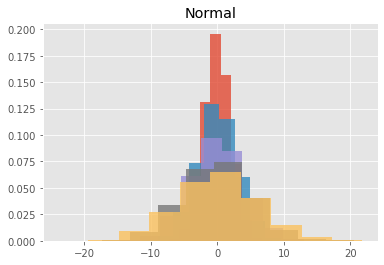

In [0]:
for i in range(2,7):
    plot_norm(sigma=i)

Дисперсия отвечает за "сгруппированность" данных. Чем шире гистограмма, тем больше дисперсия. То есть распределение больше "размазано" по различным значениям. 

Литература:
1. краткое пособие: https://istina.msu.ru/download/9446616/1dRPIT:oTvN8KzzYSrqoE4ZWdTY9JMa8lY/
2. подробная практическая статистика: https://alleng.org/d/math-stud/math-st889.htm
3. классический курс по ТВ: http://www.booksshare.net/books/physics/shiryaev-an/1957/files/veroyatnost1957.pdf
